In [1]:
%pylab inline
from Geant4 import *
from IPython.display import Image

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib

*************************************************************
 Geant4 version Name: geant4-10-03    (9-December-2016)
                      Copyright : Geant4 Collaboration
                      Reference : NIM A 506 (2003), 250-303
                            WWW : http://cern.ch/geant4
*************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...


In [2]:
class MyDetectorConstruction(G4VUserDetectorConstruction):
    "My Detector Construction"

    def __init__(self):

        G4VUserDetectorConstruction.__init__(self)
        
        
        self.solid = {}
        self.logical = {}
        self.physical = {}
       

        self.create_world(side = 4000,
                          material = "G4_AIR")
        
        self.create_cylinder(name = "vacuum", 
                             radius = 200,
                             length = 320,
                             translation = [0,0,900],
                             material = "G4_Galactic",
                             colour = [1.,1.,1.,0.1],
                             mother = 'world')
        
        self.create_cylinder(name = "upper_scatter", 
                             radius = 10,
                             length = 0.01,
                             translation = [0,0,60],
                             material = "G4_Ta",
                             colour = [1.,1.,1.,0.7],
                             mother = 'vacuum')
        
        self.create_cylinder(name = "lower_scatter", 
                             radius = 30,
                             length = 0.01,
                             translation = [0,0,20],
                             material = "G4_Al",
                             colour = [1.,1.,1.,0.7],
                             mother = 'vacuum')
        
        self.create_applicator_aperture(name = "apature_1",
                                        inner_side = 142,
                                        outer_side = 182,
                                        thickness = 6,
                                        translation = [0,0,449],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_2",
                                        inner_side = 130,
                                        outer_side = 220,
                                        thickness = 12,
                                        translation = [0,0,269],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_3",
                                        inner_side = 110,
                                        outer_side = 180,
                                        thickness = 12,
                                        translation = [0,0,140],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_4",
                                        inner_side = 100,
                                        outer_side = 140,
                                        thickness = 12,
                                        translation = [0,0,59],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "cutout",
                                        inner_side = 100,
                                        outer_side = 120,
                                        thickness = 6,
                                        translation = [0,0,50],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_cube(name = "phantom",
                         side = 500,
                         translation = [0,0,-250],
                         material = "G4_WATER",
                         colour = [0,0,1,0.4],
                         mother = 'world')
    
 
    
    def create_world(self, **kwargs):
        
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        side = kwargs['side']
        
        self.solid['world'] = G4Box("world", side/2., side/2., side/2.)
        
        self.logical['world'] = G4LogicalVolume(self.solid['world'], 
                                                material, 
                                                "world")
        
        self.physical['world'] = G4PVPlacement(G4Transform3D(), 
                                               self.logical['world'], 
                                               "world", None, False, 0)

        visual = G4VisAttributes()
        visual.SetVisibility(False)
        
        self.logical['world'].SetVisAttributes(visual)
        
    
    
    def create_cylinder(self, **kwargs):
        
        name = kwargs['name']
        radius = kwargs['radius']
        length = kwargs['length']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        
        self.solid[name] = G4Tubs(name, 0., radius, length/2., 0., 2*pi)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, translation, 
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
    
    
    def create_cube(self, **kwargs):
        
        name = kwargs['name']
        side = kwargs['side']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        self.solid[name] = G4Box(name, side/2., side/2., side/2.)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, translation, 
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
    
    
    def create_applicator_aperture(self, **kwargs):
        
        name = kwargs['name']
        inner_side = kwargs['inner_side']
        outer_side = kwargs['outer_side']
        thickness = kwargs['thickness']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        
        inner_box = G4Box("inner", inner_side/2., inner_side/2., thickness/2. + 1)
        outer_box = G4Box("outer", outer_side/2., outer_side/2., thickness/2.)

        
        self.solid[name] = G4SubtractionSolid(name, 
                                              outer_box, 
                                              inner_box)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, 
                                            translation,
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
        
        

    # -----------------------------------------------------------------
    def Construct(self): # return the world volume
        
        return self.physical['world'] 

In [3]:
# set geometry
detector = MyDetectorConstruction()
gRunManager.SetUserInitialization(detector)

In [4]:
# set physics list
physics_list = FTFP_BERT()
gRunManager.SetUserInitialization(physics_list)

<<< Geant4 Physics List simulation engine: FTFP_BERT 2.0



In [5]:
class MyPrimaryGeneratorAction(G4VUserPrimaryGeneratorAction):
    "My Primary Generator Action"

    def __init__(self):
        
        G4VUserPrimaryGeneratorAction.__init__(self)
        
        particle_table = G4ParticleTable.GetParticleTable()

        electron = particle_table.FindParticle(G4String("e-"))
        positron = particle_table.FindParticle(G4String("e+"))
        gamma = particle_table.FindParticle(G4String("gamma"))
        
        beam = G4ParticleGun()
        beam.SetParticleEnergy(6*MeV)
        beam.SetParticleMomentumDirection(G4ThreeVector(0,0,-1))
        beam.SetParticleDefinition(electron)
        beam.SetParticlePosition(G4ThreeVector(0,0,1005))
        
        self.particleGun = beam

        
    def GeneratePrimaries(self, event):
        
        self.particleGun.GeneratePrimaryVertex(event)

In [6]:
primary_generator_action = MyPrimaryGeneratorAction()
gRunManager.SetUserAction(primary_generator_action)

In [7]:
# Initialise
gRunManager.Initialize()

======       Pre-compound/De-excitation Physics Parameters     ========
Type of pre-compound inverse x-section              3
Type of de-excitation inverse x-section             3
Min excitation energy (keV)                         0.1
Level density (1/MeV)                               0.1
Time limit for long lived isomeres (ns)             1e+07
Correlated gamma emission flag                      0

 FTFP_BERT : new threshold between BERT and FTFP is over the interval 
 for pions :   3 to 12 GeV
 for kaons :   3 to 12 GeV
 for proton :  3 to 12 GeV
 for neutron : 3 to 12 GeV

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0


In [8]:
%%file raytrace.mac

/vis/open RayTracer
/vis/rayTracer/headAngle 340.
/vis/rayTracer/eyePosition 200 200 250  cm
/vis/rayTracer/trace raytrace.jpg

Writing raytrace.mac


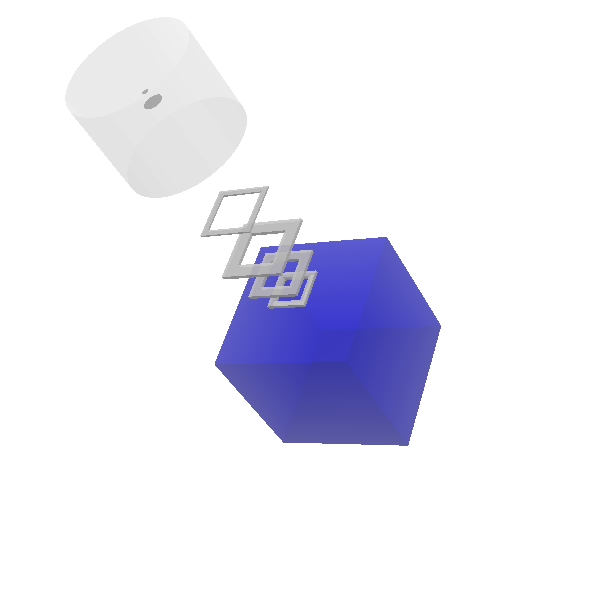

In [9]:
gUImanager.ExecuteMacroFile('raytrace.mac')

# Show image
Image(filename="raytrace.jpg")

In [10]:
!rm *.prim *.eps

rm: cannot remove '*.prim': No such file or directory
rm: cannot remove '*.eps': No such file or directory


In [11]:
%%file dawn.mac

/vis/open DAWNFILE

/vis/scene/create
/vis/scene/add/volume

/vis/scene/add/trajectories smooth
/vis/modeling/trajectories/create/drawByCharge
/vis/modeling/trajectories/drawByCharge-0/default/setDrawStepPts true
/vis/modeling/trajectories/drawByCharge-0/default/setStepPtsSize 2

/vis/scene/endOfEventAction accumulate 1000

/vis/scene/add/hits

/vis/sceneHandler/attach
#/vis/scene/add/axes 0. 0. 0. 10. cm

/vis/viewer/set/targetPoint 0.0 0.0 300.0 mm
/vis/viewer/set/viewpointThetaPhi 70 20

/vis/viewer/zoom 1

Writing dawn.mac


In [12]:
gUImanager.ExecuteMacroFile('dawn.mac')
gRunManager.BeamOn(5)

/tracking/storeTrajectory 2

phot:   for  gamma    SubType= 12  BuildTable= 0
      LambdaPrime table from 200 keV to 100 TeV in 61 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       PhotoElectric :  Emin=        0 eV    Emax=      100 TeV   AngularGenSauterGavrila  FluoActive

compt:   for  gamma    SubType= 13  BuildTable= 1
      Lambda table from 100 eV  to 1 MeV, 7 bins per decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 56 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       Klein-Nishina :  Emin=        0 eV    Emax=      100 TeV

conv:   for  gamma    SubType= 14  BuildTable= 1
      Lambda table from 1.022 MeV to 100 TeV, 18 bins per decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        BetheHeitler :  Emin=        0 eV    Emax=       80 GeV
     BetheHeitlerLPM :  Emin=       80 GeV   Emax=      100 TeV

msc:   for e-    SubType= 10
      RangeFacto

In [13]:
!dawn -d g4_00.prim


***************************************
          Fukui  Renderer         
              DAWN                
 (Drawer for Academic WritiNgs)   
 ver 3.90b (Dev. indep. Mode)
          September 01, 2010
***************************************


***** g4.prim viewer mode (default)
***** ("dawn -h" for help)

***** PostScript file "g4_00.eps" is created.
***** The showpage command is added.
sh: gv: command not found


In [14]:
!convert g4_00.eps dawnout.png

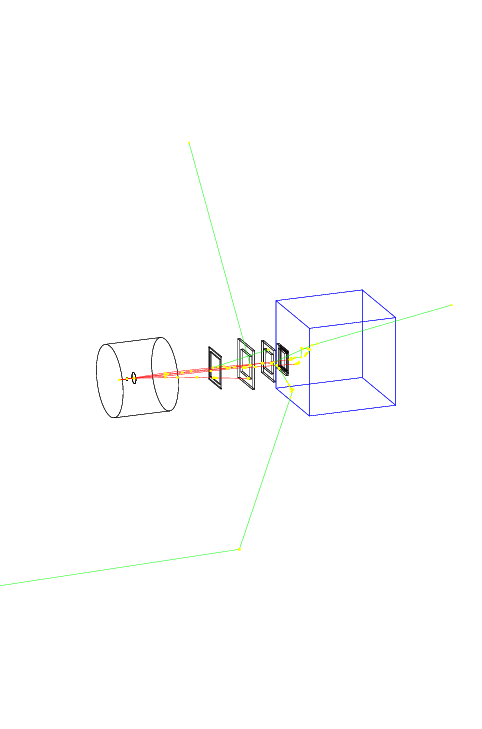

In [15]:
Image("dawnout.png")